<a href="https://colab.research.google.com/github/pcashman21/feral-cat-census/blob/main/src/notebooks/train_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script trains a YOLOv8 model to detect cats.  It is trained on a set of about 3920 images of cats, 980 of which are original (downloaded from Google's [OpenImages v7 database](https://storage.googleapis.com/openimages/web/index.html), and the rest are augmentations of the originals on a bounding-box level.  This dataset was generated by the [feral-cat-census project](https://universe.roboflow.com/paul-cashman-mxgwb/feral-cat-census/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true) in Paul Cashman's Roboflow account.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!install zipfile
!unzip /content/feral-cat-census.v1i.yolov8.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/4b24a9f348ffadd0_jpg.rf.7abb8b617526aa39cca0eb93eb74ff69.jpg  
 extracting: train/images/4b33f75e8add2d55_jpg.rf.12c4f7527c4283115b750ad8c0e983f2.jpg  
 extracting: train/images/4b33f75e8add2d55_jpg.rf.1ce22426c9ec78836a71eb72c9012a58.jpg  
 extracting: train/images/4b33f75e8add2d55_jpg.rf.d41e1cfe11621c6ae04598e171c9ae7d.jpg  
 extracting: train/images/4b3d32cc4d12c6ea_jpg.rf.5700f5d8a8c7513e32c2418fecdeb1ae.jpg  
 extracting: train/images/4b3d32cc4d12c6ea_jpg.rf.9f10b176873ece66b7c01f9e902be587.jpg  
 extracting: train/images/4b3d32cc4d12c6ea_jpg.rf.d6c7799a17d607dc22793162ab846d9d.jpg  
 extracting: train/images/4b4104633fee2802_jpg.rf.14a381ffa0753222a2b10323f125d597.jpg  
 extracting: train/images/4b4104633fee2802_jpg.rf.4bfe654ac55d9241440ca6aa3a92481d.jpg  
 extracting: train/images/4b4104633fee2802_jpg.rf.b9f5233d59f4d3d83ce040a05a247226.jpg  
 extracting: train/images/4b41671455a83386_jpg.rf.79436fc78

In [ ]:
!pip install ultralytics

from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 6.3 MB/s eta 0:00:00


100%|██████████| 6.23M/6.23M [00:00<00:00, 55.9MB/s]


In [5]:
model_configuration_path = '/content/data.yaml'
epochs = 100
image_size = 640
number_of_epochs_with_no_improvement = 10
epochs_per_checkpoint = 10
seed = 42

In [6]:
# Train the model
results = model.train(data=model_configuration_path, epochs=epochs, imgsz=image_size, patience=number_of_epochs_with_no_improvement, save_period = epochs_per_checkpoint, seed = seed, verbose = True)

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, patience=10, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

In [7]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8b0e3581f0>
fitness: 0.6379356414782951
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.61088])
names: {0: 'cat'}
plot: True
results_dict: {'metrics/precision(B)': 0.8262253831468643, 'metrics/recall(B)': 0.8023373373373374, 'metrics/mAP50(B)': 0.8814357581749898, 'metrics/mAP50-95(B)': 0.6108800729564401, 'fitness': 0.6379356414782951}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.736120353890149, 'inference': 3.038289299147958, 'loss': 0.0007682376437717014, 'postprocess': 1.8840391576076494}

In [8]:
model.export(format='saved_model',imgsz=640,keras=True)

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 153.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 78.7 MB/s eta 0:00:00
    

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 4.3s, saved as 'runs/detect/train/weights/best.onnx' (11.6 MB)
TensorFlow SavedModel: running 'onnx2tf -i "runs/detect/train/weights/best.onnx" -o "runs/detect/train/weights/best_saved_model" -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 48.9s, saved as 'runs/detect/train/weights/best_saved_model' (29.2 MB)

Export complete (53.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_saved_model imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best_saved_model imgsz=640 data=/content/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best_saved_model'

In [12]:
# See https://github.com/googlecolab/colabtools/issues/3409
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [15]:
!cp -R '/content/runs/detect/train' '/content/gdrive/My Drive/Cat images/feral-cat-census.v1i.yolov8/runs/detect'

Validate the model

In [3]:
!pip install ultralytics

from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.4/617.4 kB 10.8 MB/s eta 0:00:00


In [4]:
path_to_best = '/content/gdrive/My Drive/Cat images/feral-cat-census.v1i.yolov8/runs/detect/train/weights/best.pt'

In [5]:
model = YOLO(path_to_best)  # load a custom model

In [6]:
metrics = model.val()

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100%|██████████| 755k/755k [00:00<00:00, 80.8MB/s]
val: Scanning /content/valid/labels... 279 images, 0 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:00<00:00, 1800.85it/s]
val: New cache created: /content/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.81it/s]
                   all        279        320      0.826      0.801       0.88      0.609
Speed: 1.6ms preprocess, 5.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


In [7]:
metrics.box.map

0.6090907686324021

In [22]:
results = model.predict(source='/content/valid/images/003eae3f991df25f_jpg.rf.a7453dd0ed9c902174298a48a8e39faf.jpg', save=True)


image 1/1 /content/valid/images/003eae3f991df25f_jpg.rf.a7453dd0ed9c902174298a48a8e39faf.jpg: 640x640 1 cat, 48.9ms
Speed: 12.9ms preprocess, 48.9ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [9]:
import matplotlib.pyplot as plt

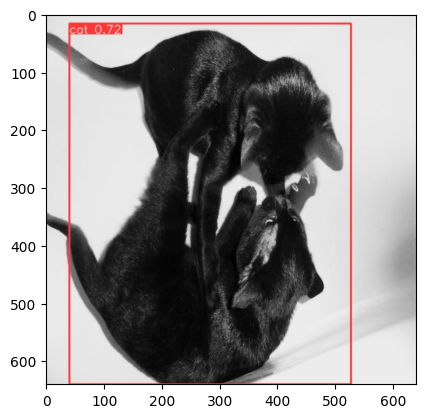

In [23]:
image = plt.imread('/content/runs/detect/predict/003eae3f991df25f_jpg.rf.a7453dd0ed9c902174298a48a8e39faf.jpg')
plt.imshow(image);

In [27]:
num_results = results.__len__()
num_results

1